<img src="https://static.toiimg.com/photo/51089680.cms" jsaction="" class="sFlh5c pT0Scc iPVvYb" style="max-width: 1000px; height: 244px; margin: 0px; width: 366px;" alt="Where To Eat Pizza In Delhi | Best Places To Get Pizza In Delhi | Times of  India Travel" jsname="kn3ccd" aria-hidden="false">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp

In [2]:
pizza=pd.read_excel("E:\Data Model - Pizza Sales.xlsx")

In [3]:
pizza.head()

order_details_id  order_id       pizza_id  quantity order_date order_time  \
0                 1         1     hawaiian_m         1 2015-01-01   11:38:36   
1                 2         2  classic_dlx_m         1 2015-01-01   11:57:40   
2                 3         2  five_cheese_l         1 2015-01-01   11:57:40   
3                 4         2    ital_supr_l         1 2015-01-01   11:57:40   
4                 5         2     mexicana_m         1 2015-01-01   11:57:40   

   unit_price  total_price pizza_size pizza_category  \
0       13.25        13.25          M        Classic   
1       16.00        16.00          M        Classic   
2       18.50        18.50          L         Veggie   
3       20.75        20.75          L        Supreme   
4       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...   
3  Calabrese Salami, Capocollo, Tomatoes, Red Oni...   
4  Tomatoes, Red Peppers, Jalapeno Peppers, Red O...   

                  pizza_name  
0         The Hawaiian Pizza  
1   The Classic Deluxe Pizza  
2      The Five Cheese Pizza  
3  The Italian Supreme Pizza  
4         The Mexicana Pizza

In [4]:
pizza=pizza.set_index(pizza.columns[0])

In [5]:
pizza.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48620 entries, 1 to 48620
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_id           48620 non-null  int64         
 1   pizza_id           48620 non-null  object        
 2   quantity           48620 non-null  int64         
 3   order_date         48620 non-null  datetime64[ns]
 4   order_time         48620 non-null  object        
 5   unit_price         48620 non-null  float64       
 6   total_price        48620 non-null  float64       
 7   pizza_size         48620 non-null  object        
 8   pizza_category     48620 non-null  object        
 9   pizza_ingredients  48620 non-null  object        
 10  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 4.5+ MB


In [6]:
pizza.pizza_id.nunique()

91

In [7]:
pizza.order_id.nunique()

21350

In [8]:
pizza.describe()

order_id      quantity                     order_date  \
count  48620.000000  48620.000000                          48620   
mean   10701.479761      1.019622  2015-06-29 11:03:43.611682560   
min        1.000000      1.000000            2015-01-01 00:00:00   
25%     5337.000000      1.000000            2015-03-31 00:00:00   
50%    10682.500000      1.000000            2015-06-28 00:00:00   
75%    16100.000000      1.000000            2015-09-28 00:00:00   
max    21350.000000      4.000000            2015-12-31 00:00:00   
std     6180.119770      0.143077                            NaN   

         unit_price   total_price  
count  48620.000000  48620.000000  
mean      16.494132     16.821474  
min        9.750000      9.750000  
25%       12.750000     12.750000  
50%       16.500000     16.500000  
75%       20.250000     20.500000  
max       35.950000     83.000000  
std        3.621789      4.437398

In [9]:
pizza.shape

(48620, 11)

In [10]:
#Step 1 : Let's see are there any null values
pizza.isnull().sum()

order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [11]:
pizza.columns

Index(['order_id', 'pizza_id', 'quantity', 'order_date', 'order_time',
       'unit_price', 'total_price', 'pizza_size', 'pizza_category',
       'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [12]:
pizza['order_time']=pizza['order_time'].astype('string')
pizza[['Hour','Minute','Second']]=pizza['order_time'].str.split(":",expand=True)
pizza['Hour'].value_counts()

Hour
12    6543
13    6203
18    5359
17    5143
19    4350
16    4185
14    3521
20    3487
15    3170
11    2672
21    2528
22    1370
23      68
10      17
09       4
Name: count, dtype: Int64

In [13]:
pizza['Hour'].unique()

<StringArray>
['11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
 '10', '09']
Length: 15, dtype: string

In [14]:
hour_counts=pizza['Hour'].value_counts()
print(hour_counts)

Hour
12    6543
13    6203
18    5359
17    5143
19    4350
16    4185
14    3521
20    3487
15    3170
11    2672
21    2528
22    1370
23      68
10      17
09       4
Name: count, dtype: Int64


Text(0.5, 1.0, 'Popular time for Orders')

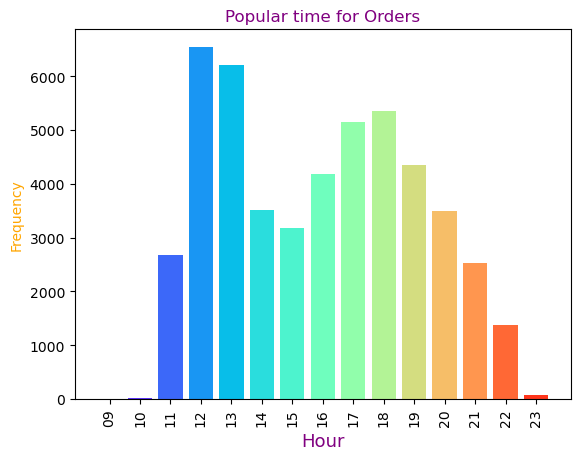

In [16]:
hour_counts=pizza['Hour'].value_counts().sort_index()
cmap = mp.get_cmap('rainbow')
colors=[ cmap(i/len(hour_counts)) for i in range(len(hour_counts))]
mp.bar(hour_counts.index,hour_counts.values,color=colors)
mp.xticks(rotation=90)
mp.xlabel('Hour',fontsize=13,color="purple")
mp.ylabel('Frequency',fontsize=10,color="Orange")
mp.title("Popular time for Orders", color="purple")

In [17]:
#X-Axis (Hour): Represents each hour of the day (e.g., 0, 1, 2, ..., 23).**
#Y-Axis (Frequency): Represents the number of orders placed at each hour.
#This graph shows us the popular or often times when the orders are placed

In [18]:
pizza["order_year"]=pd.DatetimeIndex( pizza['order_date']).year
pizza["order_year"].value_counts()

order_year
2015    48620
Name: count, dtype: int64

In [19]:
pizza["order_dates"]=pizza["order_date"].dt.day_name()
pizza["order_dates"].value_counts()

order_dates
Friday       8106
Saturday     7355
Thursday     7323
Wednesday    6797
Tuesday      6753
Monday       6369
Sunday       5917
Name: count, dtype: int64

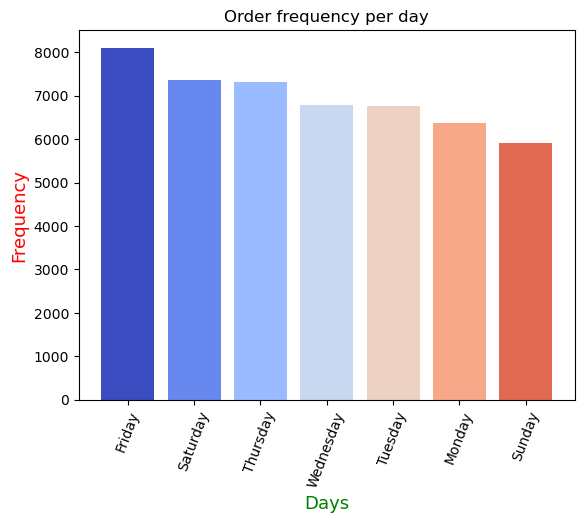

In [20]:
day_counts=pizza["order_dates"].value_counts()
cmap=mp.get_cmap("coolwarm")
colors=[ cmap(i/(len(day_counts))) for i in range(len(day_counts))]
mp.bar(day_counts.index,day_counts.values,color=colors)
mp.xticks(rotation=69,fontsize=10)
mp.xlabel("Days",fontsize=13,color='green')
mp.ylabel("Frequency",fontsize=13,color='red')
mp.title("Order frequency per day")
mp.show()

In [21]:
import seaborn as sns

In [22]:
#dataframe.loc[condition, column_name] = new_value
# Now we will extract the month and analysis the monthly orders
pizza["order_month"]=pd.DatetimeIndex(pizza["order_date"]).month
pizza.loc[(pizza["order_month"] == 1), 'order_month']="January"
pizza.loc[(pizza["order_month"] == 2), 'order_month']="February"
pizza.loc[(pizza["order_month"] == 3), 'order_month']="March"
pizza.loc[(pizza["order_month"] == 4), 'order_month']="April"
pizza.loc[(pizza["order_month"] == 5), 'order_month']="May"
pizza.loc[(pizza["order_month"] == 6), 'order_month']="June"
pizza.loc[(pizza["order_month"] == 7), 'order_month']="July"
pizza.loc[(pizza["order_month"] == 8), 'order_month']="August"
pizza.loc[(pizza["order_month"] == 9), 'order_month']="September"
pizza.loc[(pizza["order_month"] == 10), 'order_month']="October"
pizza.loc[(pizza["order_month"] == 11), 'order_month']="November"
pizza.loc[(pizza["order_month"] == 12), 'order_month']="December"

C:\Users\MY\AppData\Local\Temp\ipykernel_4308\3487775831.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'January' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  pizza.loc[(pizza["order_month"] == 1), 'order_month']="January"


In [23]:
pizza.order_month.value_counts()

order_month
July         4301
May          4239
March        4186
November     4185
January      4156
August       4094
April        4067
June         4025
February     3892
December     3859
September    3819
October      3797
Name: count, dtype: int64

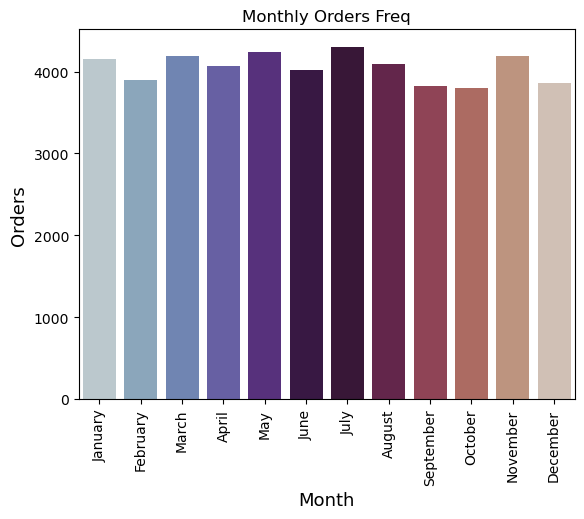

In [25]:
sns.countplot(data=pizza,x="order_month",palette="twilight")
mp.xticks(rotation=90)
mp.xlabel("Month",fontsize=13,color="black")
mp.ylabel("Orders",fontsize=13,color="black")
mp.title("Monthly Orders Freq")
mp.show()

In [26]:
pizza.pizza_id.unique()

array(['hawaiian_m', 'classic_dlx_m', 'five_cheese_l', 'ital_supr_l',
       'mexicana_m', 'thai_ckn_l', 'ital_supr_m', 'prsc_argla_l',
       'bbq_ckn_s', 'the_greek_s', 'spinach_supr_s', 'classic_dlx_s',
       'green_garden_s', 'ital_cpcllo_l', 'ital_supr_s', 'mexicana_s',
       'spicy_ital_l', 'spin_pesto_l', 'veggie_veg_s', 'mexicana_l',
       'southw_ckn_l', 'bbq_ckn_l', 'cali_ckn_l', 'cali_ckn_m',
       'pepperoni_l', 'cali_ckn_s', 'ckn_pesto_l', 'big_meat_s',
       'soppressata_l', 'four_cheese_l', 'napolitana_s', 'calabrese_m',
       'four_cheese_m', 'ital_veggie_s', 'mediterraneo_m',
       'peppr_salami_s', 'spinach_fet_l', 'napolitana_l', 'sicilian_l',
       'ital_cpcllo_m', 'southw_ckn_s', 'bbq_ckn_m', 'pepperoni_m',
       'prsc_argla_s', 'sicilian_m', 'veggie_veg_l', 'ckn_alfredo_s',
       'pepperoni_s', 'green_garden_l', 'green_garden_m', 'pep_msh_pep_l',
       'hawaiian_s', 'peppr_salami_m', 'ckn_alfredo_m', 'peppr_salami_l',
       'spin_pesto_s', 'thai_ckn_m'

In [27]:
pizza.pizza_id.value_counts()

pizza_id
big_meat_s        1811
thai_ckn_l        1365
five_cheese_l     1359
four_cheese_l     1273
classic_dlx_m     1159
                  ... 
mexicana_s         160
calabrese_s         99
ckn_alfredo_s       96
green_garden_l      94
the_greek_xxl       28
Name: count, Length: 91, dtype: int64

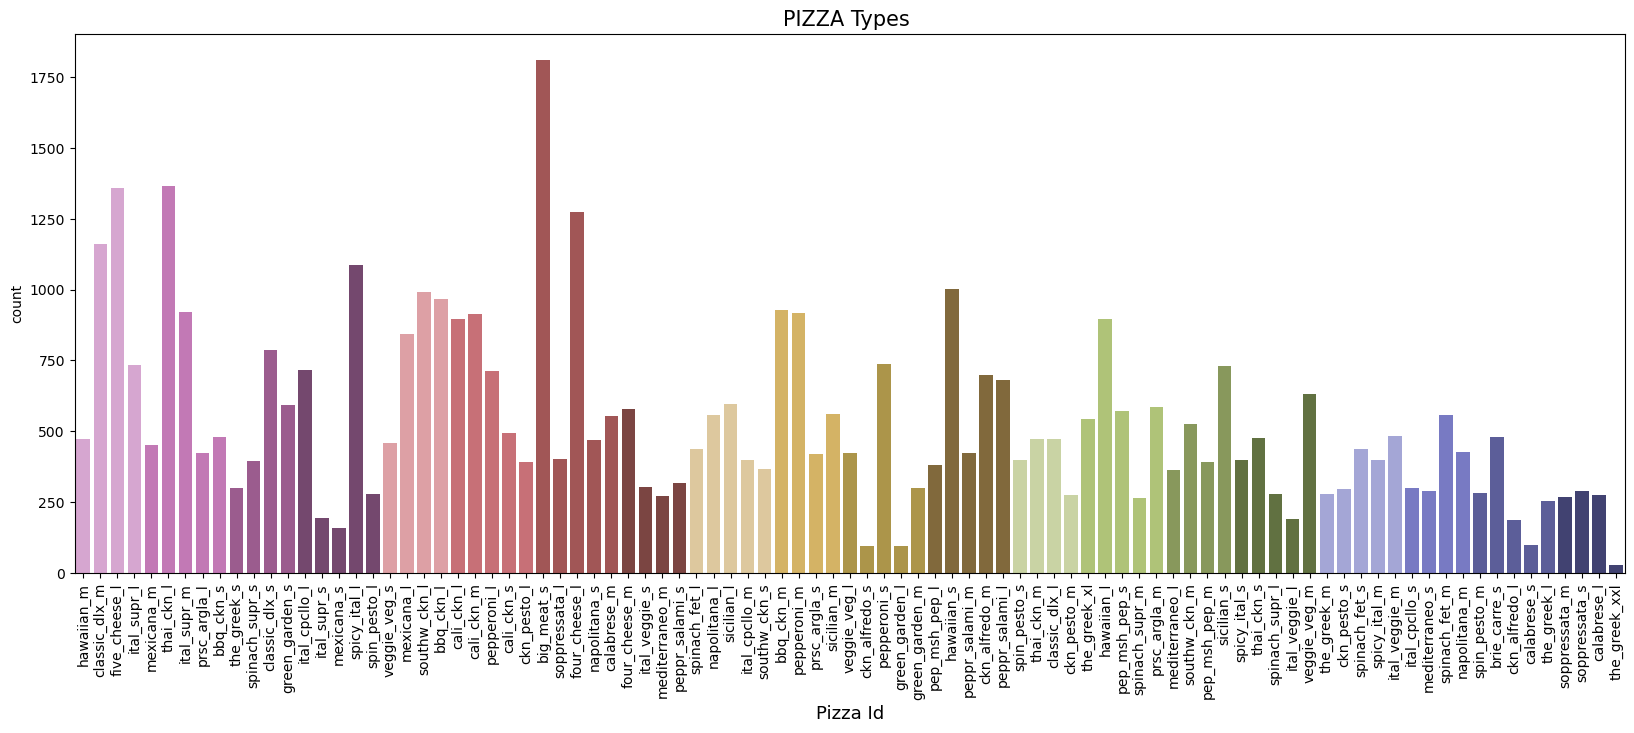

In [28]:
fig,ax = mp.subplots(figsize=(20,7))
sns.countplot(data=pizza,x="pizza_id",palette="tab20b_r",ax=ax)
mp.xticks(rotation=90)
mp.xlabel("Pizza Id",fontsize=13,color="black")
mp.title("PIZZA Types ",color="black",fontsize=15)
mp.show()

In [29]:
pizza.pizza_size.value_counts()

pizza_size
L      18526
M      15385
S      14137
XL       544
XXL       28
Name: count, dtype: int64

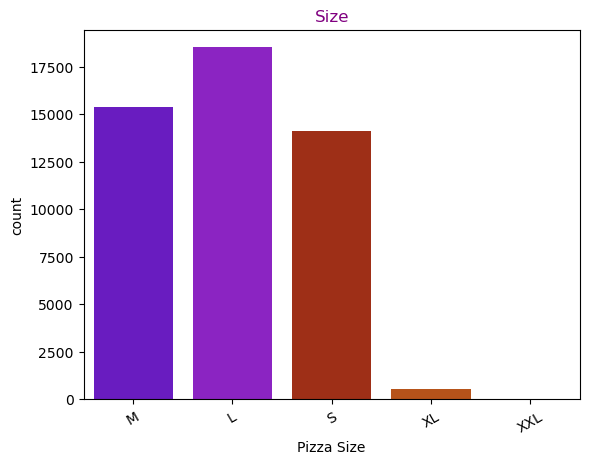

In [33]:
sns.countplot(data=pizza,x="pizza_size",palette="gnuplot")
mp.xticks(rotation=30)
mp.xlabel("Pizza Size")
mp.title("Size",color="Purple")
mp.show()

In [34]:
pizza.pizza_category.value_counts()

pizza_category
Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: count, dtype: int64

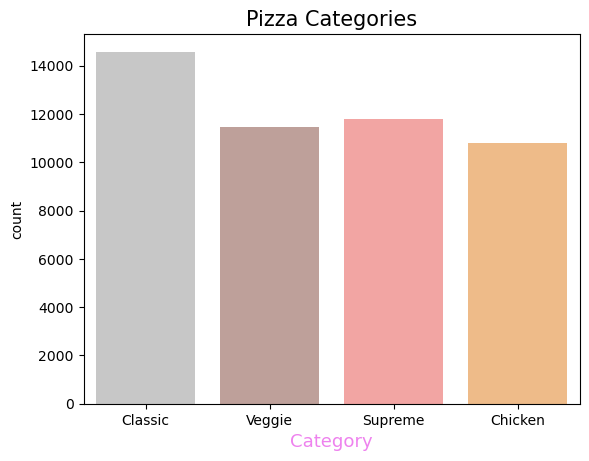

In [35]:
sns.countplot(data=pizza,x="pizza_category",palette="tab20_r")
mp.xlabel("Category",fontsize=13,color="violet")
mp.title("Pizza Categories",fontsize=15)
mp.show()

In [36]:
pizza.pizza_category

order_details_id
1        Classic
2        Classic
3         Veggie
4        Supreme
5         Veggie
          ...   
48616    Chicken
48617     Veggie
48618    Classic
48619     Veggie
48620    Chicken
Name: pizza_category, Length: 48620, dtype: object

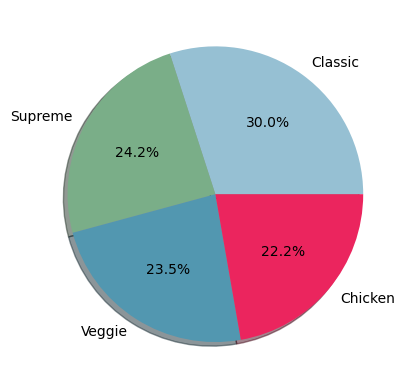

In [37]:
sizes=pizza["pizza_category"].value_counts()
labels=sizes.index
mp.pie(sizes,
       labels=labels,
       rotatelabels=False,
       autopct="%1.1f%%",
       colors=["#96c0d3","#7aae88","#5297b0","#eb255e"],
       shadow=True,
       startangle=0)
mp.show()

In [38]:
pizza.pizza_ingredients.unique()

array(['Sliced Ham, Pineapple, Mozzarella Cheese',
       'Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon',
       'Mozzarella Cheese, Provolone Cheese, Smoked Gouda Cheese, Romano Cheese, Blue Cheese, Garlic',
       'Calabrese Salami, Capocollo, Tomatoes, Red Onions, Green Olives, Garlic',
       'Tomatoes, Red Peppers, Jalapeno Peppers, Red Onions, Cilantro, Corn, Chipotle Sauce, Garlic',
       'Chicken, Pineapple, Tomatoes, Red Peppers, Thai Sweet Chilli Sauce',
       'Prosciutto di San Daniele, Arugula, Mozzarella Cheese',
       'Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce',
       'Kalamata Olives, Feta Cheese, Tomatoes, Garlic, Beef Chuck Roast, Red Onions',
       'Spinach, Red Onions, Pepperoni, Tomatoes, Artichokes, Kalamata Olives, Garlic, Asiago Cheese',
       'Spinach, Mushrooms, Tomatoes, Green Olives, Feta Cheese',
       'Capocollo, Red Peppers, Tomatoes, Goat Cheese, Garlic, Oregano',
       'Capocollo, Tomatoes, Goat C

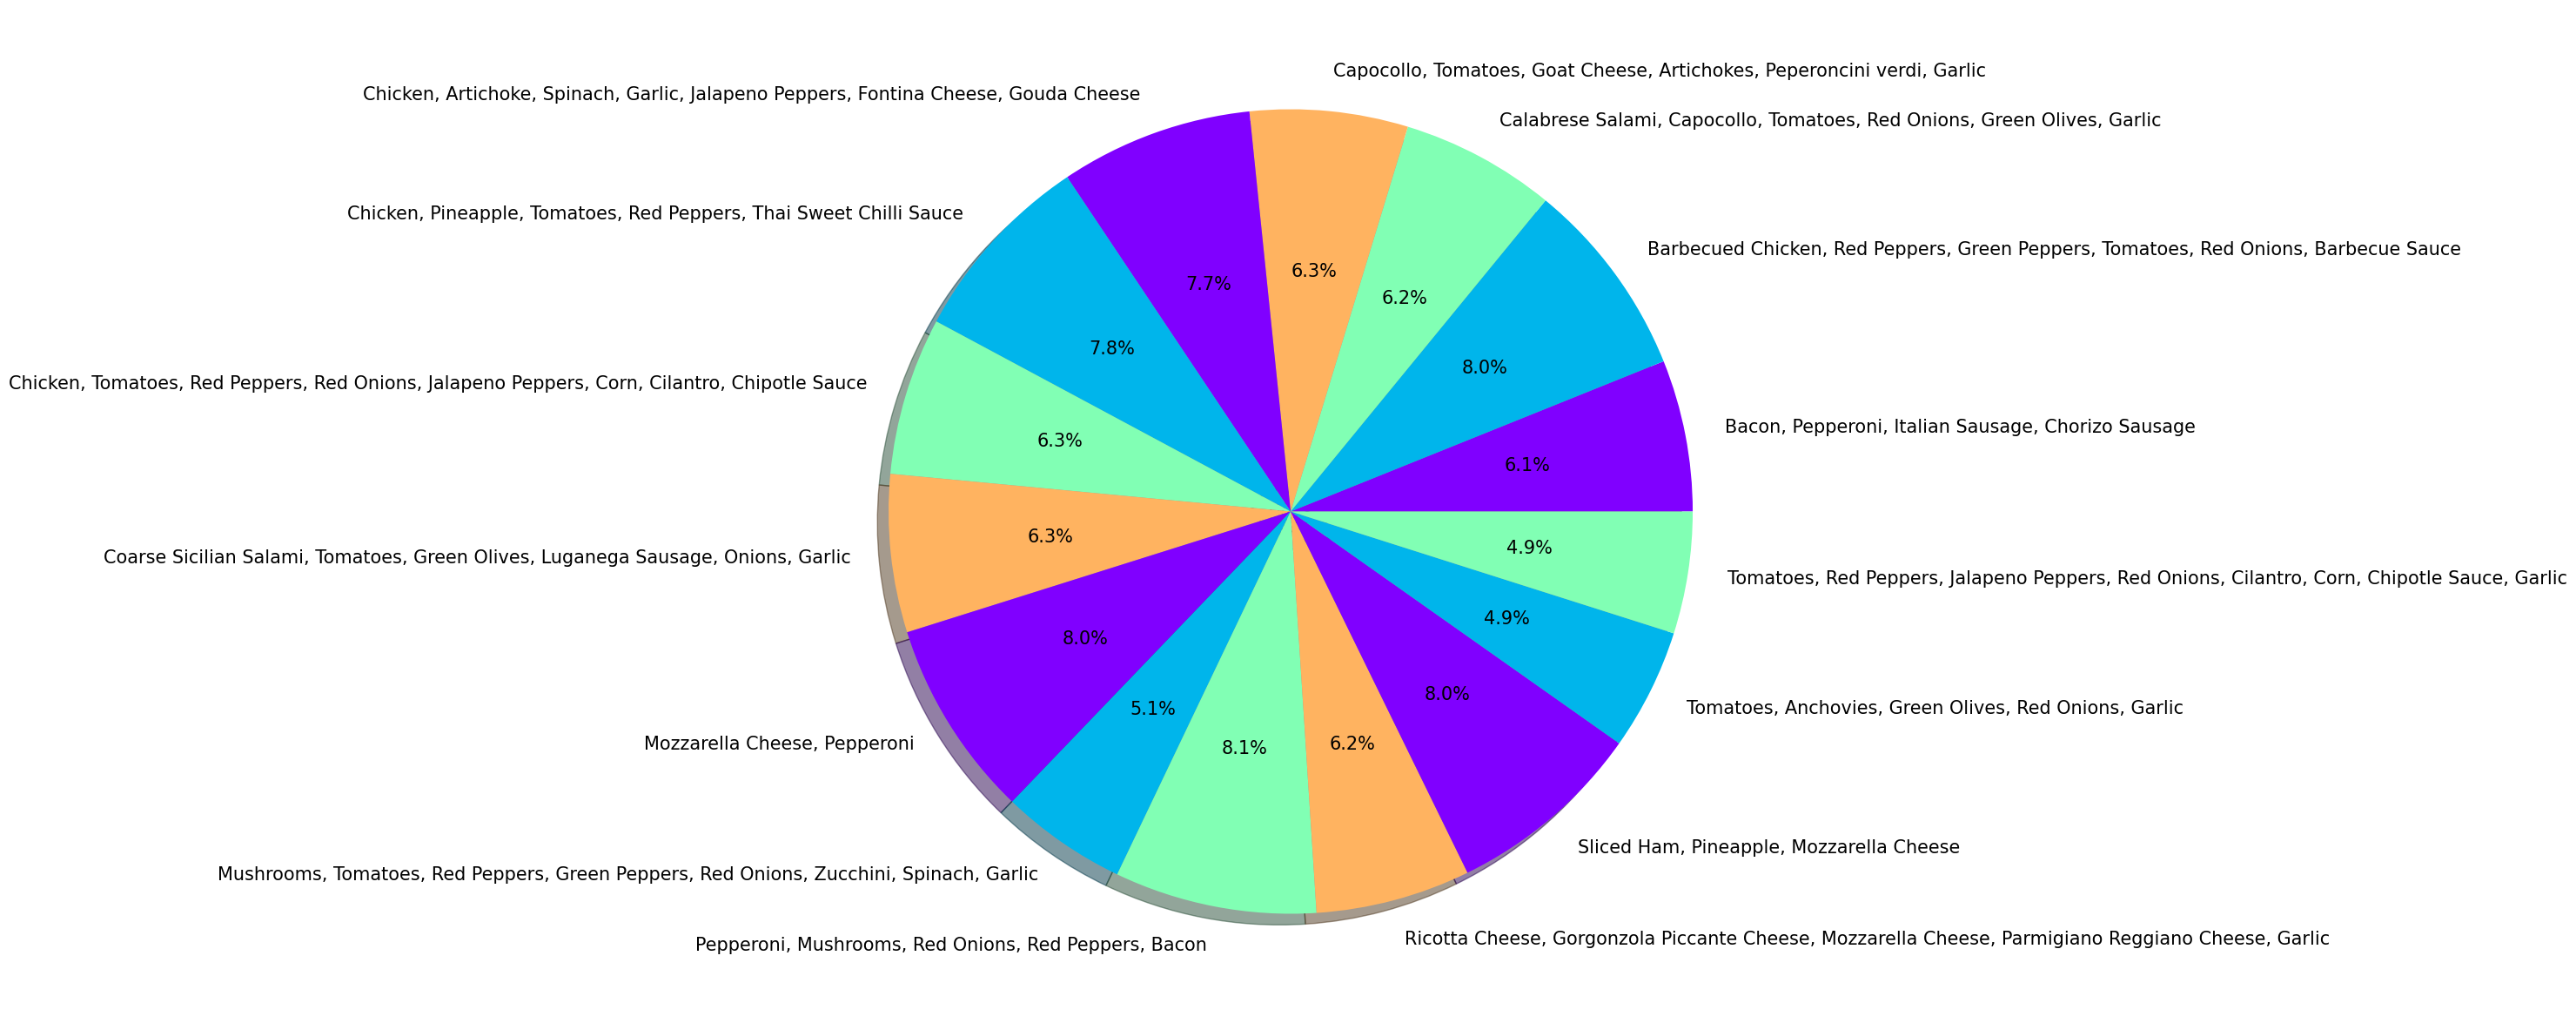

In [39]:
#Top 15 most used ingredients

cmap = mp.get_cmap('rainbow')  # You can choose any other colormap
norm = mp.Normalize(vmin=0, vmax=len(sizes))
# Generate colors from the colormap
colors = [cmap(norm(i)) for i in range(len(sizes))]
mp.figure(figsize=(25,15))
sizes=pizza["pizza_ingredients"].value_counts().head(15).sort_index()
labels=sizes.index
mp.pie(sizes,
       labels=labels,
       rotatelabels=False,
       autopct="%1.1f%%",
       colors=colors,
       shadow=True,
       textprops={'fontsize':15},
       startangle=0)
mp.show()
# Double click to increase size

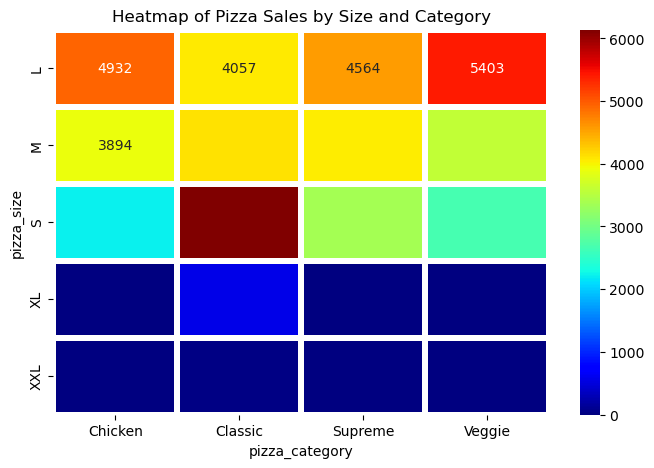

In [40]:
pivot_table=pizza.pivot_table(index="pizza_size",columns="pizza_category",values="quantity",aggfunc="sum",fill_value=0)
mp.figure(figsize=(8, 5))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='jet',linewidths=3,vmin=0, vmax=pivot_table.max().max())
mp.title('Heatmap of Pizza Sales by Size and Category')
mp.show()

In [41]:
pizza.pizza_name.nunique()

32

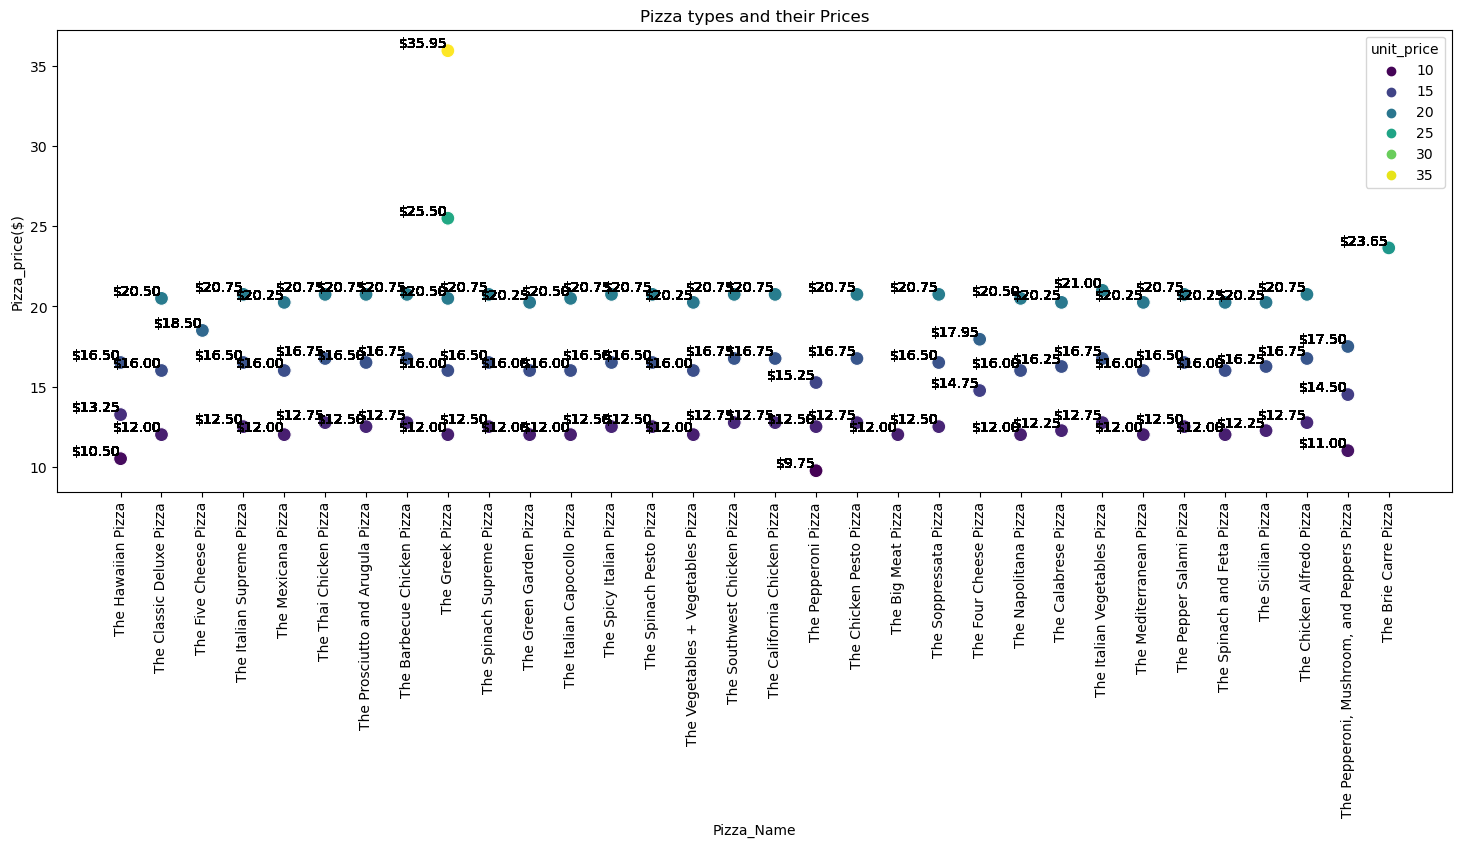

In [42]:
mp.figure(figsize=(18,6))
sns.scatterplot(data=pizza,x="pizza_name",y="unit_price",s=100,hue="unit_price",palette="viridis")
for i in range(len(pizza)):
    mp.text(x=pizza.pizza_name.iloc[i],  # Use .iloc for integer-location based indexing
        y=pizza.unit_price.iloc[i],  # Use .iloc for integer-location based indexing
        s=f'${pizza.unit_price.iloc[i]:.2f}',  # Add price label
        ha='right', 
        va='bottom')
mp.xticks(rotation=90)
mp.xlabel("Pizza_Name")
mp.ylabel("Pizza_price($)")
mp.title("Pizza types and their Prices")
mp.show()

In [46]:
import plotly.express as px
w_data=pizza.sort_values(by='total_price',ascending=True)
fig=px.sunburst(
    w_data,
    path=['pizza_category','pizza_size'],
    values='total_price',
    color='total_price',
    color_continuous_scale="rainbow")
fig.show()

In [47]:
z=pizza["pizza_category"].value_counts()
fig=px.bar(
    z,
    x=z.index,  # Categories on the x-axis
    y=z.values, # Count of each category on the y-axis
    color=z.index,  # Color by category
    text=z.values,  # Display the count on top of the bars
    labels={'index': 'pizza_category', 'y': 'total_price', 'text': 'total_price'},
    template='ggplot2',  # Style template for the plot
    title='<b>Total Money Earned From Pizza Categories</b>'
)
fig.show()

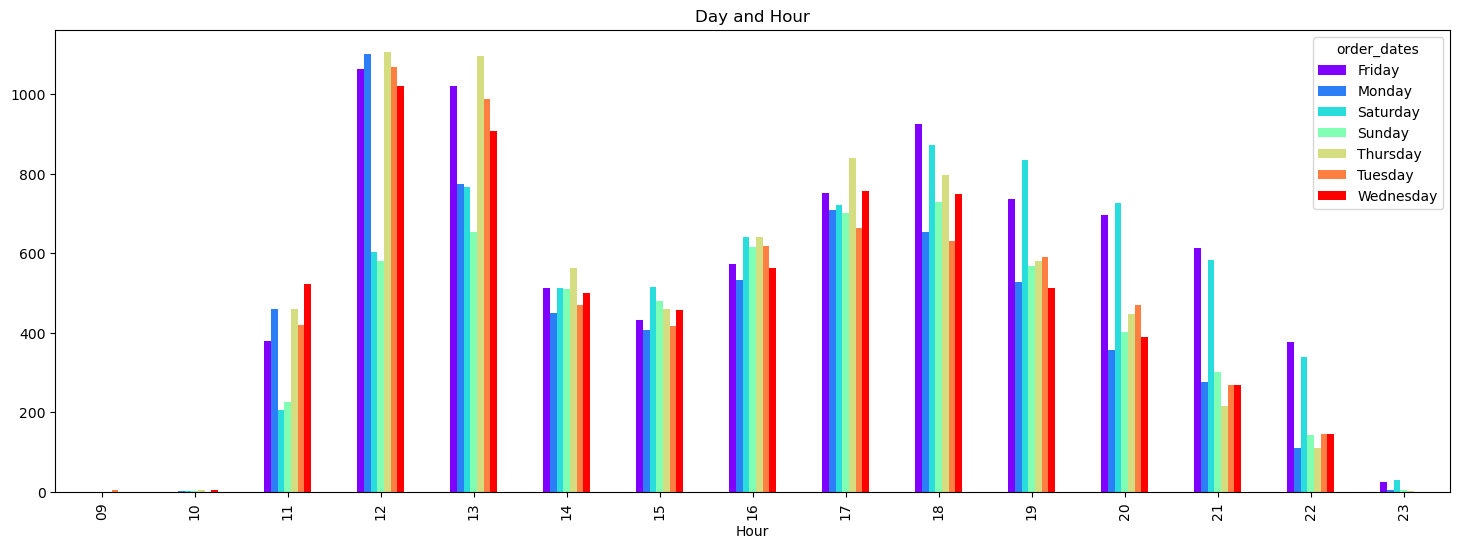

In [48]:
# This plot shows the most busiest hours everyday
pd.crosstab(pizza['Hour'],pizza['order_dates']).plot(kind='bar',
                                       figsize=(18,6),cmap='rainbow',title="Day and Hour")
mp.show()

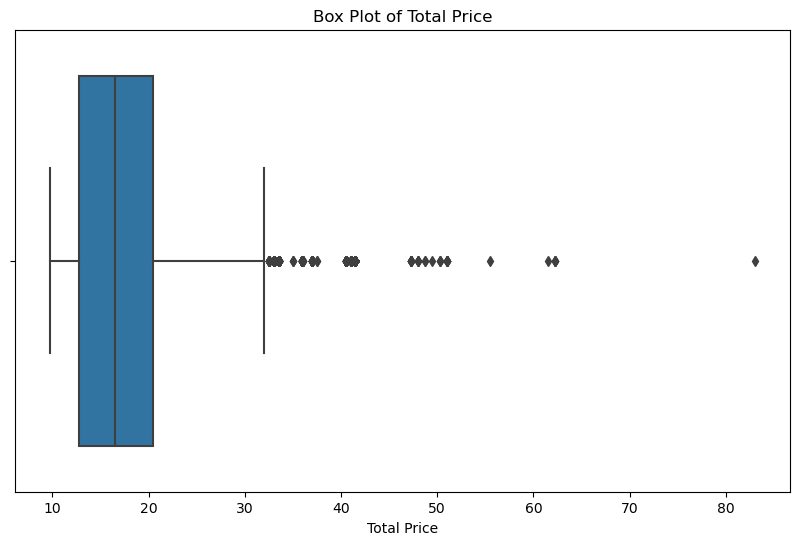

In [49]:
mp.figure(figsize=(10, 6))
sns.boxplot(x=pizza['total_price'])
mp.title('Box Plot of Total Price')
mp.xlabel('Total Price')
mp.show()

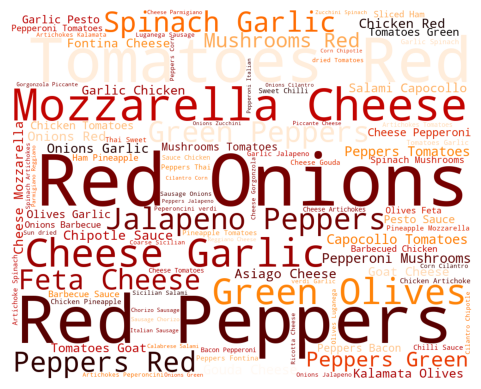

In [50]:
from wordcloud import WordCloud
text=' '.join(pizza['pizza_ingredients'])
wordcloud=WordCloud(colormap='gist_heat', width=1000, 
    height=800,
    max_words=100,             # Maximum number of words to display
    min_font_size=10,
    background_color='white').generate(text)
mp.imshow(wordcloud)
mp.axis('off')
mp.show()

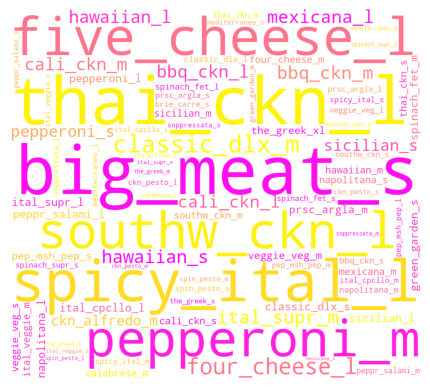

In [51]:
text=' '.join(pizza['pizza_id'])
wordcloud=WordCloud(colormap="spring_r",width=1000,height=900,min_font_size=12,background_color='white').generate(text)
mp.imshow(wordcloud)
mp.axis('off')
mp.show()

In [52]:
# The End of Analysis